# ## importing required file nad package

In [1]:

from sklearn.datasets import fetch_openml

In [2]:
mnist= fetch_openml("mnist_784")

mnist

In [3]:
x,y = mnist["data"], mnist["target"]

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

## import packages for show in diagram

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt


In [8]:
some_digit = x.to_numpy()[36600]
some_digit_image= some_digit.reshape(28,28)


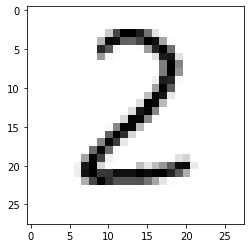

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [ ]:
## slicing data into train and test set

In [10]:
x_train,x_test= x[:60000], x[60000:]

In [11]:
y_train, y_test= y[:60000], y[60000:]

## shuffling train data

In [12]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

## convert string to int and make target in bool formate

In [13]:
y_train= y_train.astype(np.int64)
y_test= y_test.astype(np.int64)
y_train_2= (y_train!=4)
y_test_2= (y_test!=4)

In [14]:
y_train_2


10545     True
27579     True
28893     True
18833     True
32646     True
         ...  
45073     True
53957     True
6025     False
39803     True
2966      True
Name: class, Length: 60000, dtype: bool

## import Logisticregression and predicting 

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [16]:
clf.fit(x_train,y_train_2)

f:\kaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
clf.predict([some_digit])

f:\kaggle\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

## use cross validaton

In [22]:
from sklearn.model_selection import cross_val_score

a=cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

f:\kaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\kaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

In [23]:
a.mean()

0.9817166666666667